# Putting all code together

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import utility libraries
import util
import preprocessing
import importlib


In [ ]:
import nlp_util

In [ ]:
nlp_task = nlp_util.NLP_Task()

# Load Files

In [ ]:
# load files
tr_file, va_file, te_file = util.load_files()
tr_dict = util.tsv_to_dict(tsv_file=tr_file)
va_dict = util.tsv_to_dict(tsv_file=va_file)
te_dict = util.tsv_to_dict(tsv_file=te_file)

# Preprocess Files

In [ ]:
tr_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=tr_file)
va_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=va_file)
te_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=te_file)

In [ ]:
features_training = pd.DataFrame()
features_validation = pd.DataFrame()
features_testing = pd.DataFrame()

In [ ]:
features_training['text'] = tr_file['preprocessed']
features_validation['text'] = va_file['preprocessed']
features_testing['text'] = te_file['preprocessed']

# Distribution of the data

In [ ]:
import plotting_util
importlib.reload(plotting_util)

In [ ]:
data_by_label = [ len(tr_file['Label'].values[tr_file['Label'] == 'pants-fire']),
    len(tr_file['Label'].values[tr_file['Label'] == 'false']),
                 len(tr_file['Label'].values[tr_file['Label'] == 'barely-true']),
                 len(tr_file['Label'].values[tr_file['Label'] == 'half-true']),
                 len(tr_file['Label'].values[tr_file['Label'] == 'mostly-true']),
                len(tr_file['Label'].values[tr_file['Label'] == 'true'])
                ]
data_labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true','true']

In [ ]:
#bar_plot = plotting_util.plot_bar_chart(chartname='Liar liar dataset distribution', barnames=data_labels, barvalues=data_by_label,
#                             barcolors=['skyblue'])
#plt.plot()

#pie_plot = plotting_util.plot_pie_chart(chartname='myplot', labels=data_labels, values=data_by_label)
sizes = data_by_label
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=data_labels, autopct='%1.1f%%', explode= explode,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Pie chart
labels = ['Pants-fire', 'False', 'Barely-true', 'Half-true', 'Mostly-true','True']
sizes = data_by_label
#colors
colors = ['#ff4d4d','#ff794d','#ffa64d','#d2ff4d','#a6ff4d','#4dff4d']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)


fig1, ax1 = plt.subplots(figsize=(6,6)) 
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode, textprops={'fontsize': 17})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

plt.tight_layout()
plt.show()

# Extract Features

### Extracting POS tags grouped by unigrams, bigrams and trigrams

In [ ]:
# POS extracted from no preprocessed data for training, validation and testing files
unigram_pos, bigrams_pos, trigram_pos = preprocessing.extract_POS(statements=tr_dict['statement'])
unigram_pos_va, bigrams_pos_va, trigram_pos_va = preprocessing.extract_POS(statements=va_dict['statement'])
unigram_pos_te, bigrams_pos_te, trigram_pos_te = preprocessing.extract_POS(statements=te_dict['statement'])

In [ ]:
# Pos extracted from preprocessed data for training, validation and testing files
unigram_pos_p, bigrams_pos_p, trigram_pos_p = preprocessing.extract_POS(tr_file['preprocessed'].values)
unigram_pos_p_va, bigrams_pos_p_va, trigram_pos_p_va = preprocessing.extract_POS(va_file['preprocessed'].values)
unigram_pos_p_te, bigrams_pos_p_te, trigram_pos_p_te = preprocessing.extract_POS(te_file['preprocessed'].values)

In [ ]:
list_to_remove = ['NNP','CD']
# Training
removed_pos = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p)
removed_pos_va =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_va)
removed_pos_te =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_te)

removed_pos_bigrams = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos)
removed_pos_bigrams_va = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va)
removed_pos_bigrams_te = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te)

removed_pos_trigrams = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos)
removed_pos_trigrams_va = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va)
removed_pos_trigrams_te = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te)

In [ ]:
list_to_remove = ['NNP','CD']
features_training['pos'] = [" ".join(x).replace('<s>','').replace('$','dollar').strip() for x in removed_pos]
features_validation['pos'] = [" ".join(x).replace('<s>','').replace('$','dollar').strip() for x in removed_pos_va]
features_testing['pos'] = [" ".join(x).replace('<s>','').replace('$','dollar').strip() for x in removed_pos_te]

In [ ]:
list_to_remove = ['NNP','CD']
features_training['pos_bi'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_bigrams]
features_validation['pos_bi'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_bigrams_va]
features_testing['pos_bi'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_bigrams_te]

In [ ]:
list_to_remove = ['NNP','CD']
features_training['pos_tri'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_trigrams]
features_validation['pos_tri'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_trigrams_va]
features_testing['pos_tri'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_trigrams_te]

### Get unique values for unigrams, bigrams and trigrams

In [ ]:
# Unique list of unigrams, bigrams and trigrams for no preprocessed data
unigram_list_tr = nlp_task.UniquePosTags(unigram_pos)
bigram_list_tr = nlp_task.UniquePosTags(bigrams_pos)
trigram_list_tr = nlp_task.UniquePosTags(trigram_pos)

In [ ]:
# Unique list of unigrams, bigrams and trigrams for preprocessed data
unigram_list_tr_processed = nlp_task.UniquePosTags(unigram_pos_p)
bigram_list_tr_processed = nlp_task.UniquePosTags(bigrams_pos_p)
trigram_list_tr_processed = nlp_task.UniquePosTags(trigram_pos_p)

### Removing duplicated POS in bigrams and trigrams [NNP and CD]

For example: The/DT economy/NN bled/VBD $/$ 24/CD billion/CD due/JJ to/TO the/DT government/NN shutdown/NN ./. <br>
In this case having CD_CD is the same as having only CD<br>
Same with: <br>
U.S./NNP Rep./NNP Ron/NNP Kind/NNP ,/, D-Wis./NNP ,/, and/CC his/PRP$ fellow/JJ Democrats/NNS went/VBD on/IN a/DT spending/NN spree/NN and/CC now/RB their/PRP$ credit/NN card/NN is/VBZ maxed/VBN out/RP <br>
We don't need all those NNPs to find a pattern and it might be noisy to the ML algorithm<br>

In [ ]:
# For raw data

list_to_remove = ['NNP','CD']
# Training
removed_pos = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos)
removed_pos_bigrams = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos)
removed_pos_trigrams = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos)

# Validdation
removed_pos_va =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_va)
removed_pos_bigrams_va = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va)
removed_pos_trigrams_va = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va)

# Testing
removed_pos_te =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_te)
removed_pos_bigrams_te = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te)
removed_pos_trigrams_te = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te)

#LIST OF UNIQUE BIGRAMS AND TRIGRAMS AFTER REMOVING CONSECUTIVE SAME TAGS
removed_unique_bigrams = nlp_task.UniquePosTags(postags=removed_pos_bigrams)
removed_unique_trigrams = nlp_task.UniquePosTags(postags=removed_pos_trigrams)

In [ ]:
# For processed data
list_to_remove = ['NNP','CD']
# Training
removed_pos_p = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p)
removed_pos_bigrams_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_p)
removed_pos_trigrams_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_p)

# Validdation
removed_pos_va_p =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_va)
removed_pos_bigrams_va_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va_p)
removed_pos_trigrams_va_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va_p)

# Testing
removed_pos_te_p =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_te)
removed_pos_bigrams_te_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te_p)
removed_pos_trigrams_te_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te_p)

#LIST OF UNIQUE BIGRAMS AND TRIGRAMS AFTER REMOVING CONSECUTIVE SAME TAGS
removed_unique_bigrams_p = nlp_task.UniquePosTags(postags=removed_pos_bigrams_p)
removed_unique_trigrams_p = nlp_task.UniquePosTags(postags=removed_pos_trigrams_p)

In [ ]:
len(unigram_list_tr)

### Add numerical labels for each of the sentence in the datasets

In [ ]:
# Labels for multiclassification and binary classification tasks
multi_labels = {'false':0, 'true':1,'pants-fire':2,'barely-true':3,'half-true':4,'mostly-true':5}
binary_labels = {'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}


tr_file['b_label'] = np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=binary_labels))
va_file['b_label'] = np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=binary_labels))
te_file['b_label'] = np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=binary_labels))

tr_file['m_label'] = np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=multi_labels))
va_file['m_label'] = np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=multi_labels))
te_file['m_label'] = np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=multi_labels))

In [ ]:
features_training['b_label']= np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=binary_labels))
features_validation['b_label']= np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=binary_labels))
features_testing['b_label']= np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=binary_labels))

features_training['m_label']= np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=multi_labels))
features_validation['m_label']= np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=multi_labels))
features_testing['m_label']= np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=multi_labels))

### Drop unnecesary columns from dataframes

In [ ]:
# Once this code is executed and you try to re run it again it is going to show an error because columns already were remoded
unnecesary_columns = ['BT', 'FC', 'HT', 'MT', 'PF']
tr_file = tr_file.drop(unnecesary_columns, axis=1)
va_file = va_file.drop(unnecesary_columns, axis=1)
te_file = te_file.drop(unnecesary_columns, axis=1)

### Extract POS features from dataset

In [ ]:
importlib.reload(preprocessing)

After having ran some experiments with decision trees regarding POS we came up with a list of POS unigrams, bigrams and trigrams that were more relevant for classifying mostly ture and mostly false news.
<br>
POS unigrams: ['VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'IN', 'WRB', 'VBD', 'PRP', 'RP', 'WDT', 'VB', 'NNP', 'VBG', 'PRP$', 'VBN', 'CD', 'RB', 'WP', 'JJS', 'JJR', 'EX', 'RBS', 'FW', 'LS']
 <br>
POS brigrams: ['NNPS_VBP', 'VB_NNP', 'IN_DT', 'VB_JJ', 'JJ_CD', 'CD_NNS', 'DT_JJS', 'JJR_IN', 'IN_CD', 'CC_IN', 'RB_VBD', 'CD_NN', 'NN_TO', 'JJR_JJ', 'VB_CD'] <br>
POS trigrams: ['VBD_VBN_IN', 'IN_DT_JJ', 'CD_NN_IN', 'IN_CD_NNS', 'IN_DT_NN', 'DT_JJ_CD', 'MD_VB_IN', 'JJS_JJ_NN', 'CC_JJ_NNS', 'JJ_NNS_VBP', 'VBP_CD_NN', 'NNS_,_CD', 'sos_JJR_IN', 'IN_DT_NNS','JJ_NN_MD'] <br>

In [ ]:
pos_relevant_unigrams =  ['VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'IN', 'WRB', 'VBD', 'PRP', 'RP', 'WDT', 'VB', 'NNP', 'VBG', 'PRP$', 'VBN', 'CD', 'RB', 'WP', 'JJS', 'JJR', 'EX', 'RBS', 'FW', 'LS'] 
pos_relevant_bigrams = ['NNPS_VBP', 'VB_NNP', 'IN_DT', 'VB_JJ', 'JJ_CD', 'CD_NNS', 'DT_JJS', 'JJR_IN', 'IN_CD', 'CC_IN', 'RB_VBD', 'CD_NN', 'NN_TO', 'JJR_JJ', 'VB_CD'] 
pos_relevant_trigrams = ['VBD_VBN_IN', 'IN_DT_JJ', 'CD_NN_IN', 'IN_CD_NNS', 'IN_DT_NN', 'DT_JJ_CD', 'MD_VB_IN', 'JJS_JJ_NN', 'CC_JJ_NNS', 'JJ_NNS_VBP', 'VBP_CD_NN', 'sos_JJR_IN', 'IN_DT_NNS','JJ_NN_MD'] 

In [ ]:
Xtr_onehot_unigram, Xtr_count_unigram, Xtr_tfidf_unigram, Xval_onehot_unigram, Xval_count_unigram, Xval_tfidf_unigram, Xte_onehot_unigram, Xte_count_unigram, Xte_tfidf_unigram = util.GetFeaturesFromPOS(training_data=unigram_pos_p, validation_data=unigram_pos_p_va, testing_data=unigram_pos_p_te, user_defined_vocabulary=pos_relevant_unigrams)

In [ ]:
sum(Xtr_onehot_unigram)

In [ ]:
Xtr_onehot_bigrams, Xtr_count_bigrams, Xtr_tfidf_bigrams, Xval_onehot_bigrams, Xval_count_bigrams, Xval_tfidf_bigrams, Xte_onehot_bigrams, Xte_count_bigrams, Xte_tfidf_bigrams = util.GetFeaturesFromPOS(training_data=removed_pos_bigrams_p, validation_data=removed_pos_bigrams_va_p, testing_data=removed_pos_bigrams_te_p, user_defined_vocabulary=pos_relevant_bigrams)

In [ ]:
sum(Xtr_onehot_bigrams)

In [ ]:
Xtr_onehot_trigram, Xtr_count_trigram, Xtr_tfidf_trigram, Xval_onehot_trigram, Xval_count_trigram, Xval_tfidf_trigram, Xte_onehot_trigram, Xte_count_trigram, Xte_tfidf_trigram = util.GetFeaturesFromPOS(training_data=trigram_pos, validation_data=trigram_pos_va, testing_data=trigram_pos_te, user_defined_vocabulary=pos_relevant_trigrams)

In [ ]:
sum(Xtr_onehot_trigram)

In [ ]:
str(Xtr_onehot_trigram[0])

In [ ]:
#saving vectors representing bigrams
tr_file['pos_unigrams_1hot'] =  [str(x) for x in Xtr_onehot_unigram]
tr_file['pos_bigrams_1hot'] = [str(x) for x in Xtr_onehot_bigrams]
tr_file['pos_trigrams_1hot'] = [str(x) for x in Xtr_onehot_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_1hot'] =  [str(x) for x in Xval_onehot_unigram]
va_file['pos_bigrams_1hot'] = [str(x) for x in Xval_onehot_bigrams]
va_file['pos_trigrams_1hot'] = [str(x) for x in Xval_onehot_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_1hot'] =  [str(x) for x in Xte_onehot_unigram]
te_file['pos_bigrams_1hot'] = [str(x) for x in Xte_onehot_bigrams]
te_file['pos_trigrams_1hot'] = [str(x) for x in Xte_onehot_trigram]

#saving vectors representing bigrams
tr_file['pos_unigrams_count'] =  [str(x) for x in Xtr_count_unigram]
tr_file['pos_bigrams_count'] = [str(x) for x in Xtr_count_bigrams]
tr_file['pos_trigrams_count'] = [str(x) for x in Xtr_count_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_count'] =  [str(x) for x in Xval_count_unigram]
va_file['pos_bigrams_count'] = [str(x) for x in Xval_count_bigrams]
va_file['pos_trigrams_count'] = [str(x) for x in Xval_count_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_count'] =  [str(x) for x in Xte_count_unigram]
te_file['pos_bigrams_count'] = [str(x) for x in Xte_count_bigrams]
te_file['pos_trigrams_count'] = [str(x) for x in Xte_count_trigram]

#saving vectors representing bigrams
tr_file['pos_unigrams_tfidf'] =  [str(x) for x in Xtr_tfidf_unigram]
tr_file['pos_bigrams_tfidf'] = [str(x) for x in Xtr_tfidf_bigrams]
tr_file['pos_trigrams_tfidf'] = [str(x) for x in Xtr_tfidf_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_tfidf'] =  [str(x) for x in Xval_tfidf_unigram]
va_file['pos_bigrams_tfidf'] = [str(x) for x in Xval_tfidf_bigrams]
va_file['pos_trigrams_tfidf'] = [str(x) for x in Xval_tfidf_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_tfidf'] =  [str(x) for x in Xte_tfidf_unigram]
te_file['pos_bigrams_tfidf'] = [str(x) for x in Xte_tfidf_bigrams]
te_file['pos_trigrams_tfidf'] = [str(x) for x in Xte_tfidf_trigram]



# Key words 

In [ ]:
importlib.reload(preprocessing)

In [ ]:
features_training['key_words'] = preprocessing.get_keywords(tr_file)
features_validation['key_words'] = preprocessing.get_keywords(va_file)
features_testing['key_words'] = preprocessing.get_keywords(te_file)

In [ ]:
#preprocessing.bigphrase_tfidf_feats(tr_file[:3])

# LIWC Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Load LIWC analysis files
liwc_tr = pd.read_csv('..\\dataset\\{0}'.format('train_liwc.csv'))
liwc_va = pd.read_csv('..\\dataset\\{0}'.format('valid_liwc.csv'))
liwc_te = pd.read_csv('..\\dataset\\{0}'.format('test_liwc.csv'))

In [ ]:
# Scale the features so there are equally treated in terms of measure units
scaler = MinMaxScaler()
liwc_features_tr = scaler.fit_transform(liwc_tr.iloc[1:,3:])
liwc_features_va = scaler.transform(liwc_va.iloc[:,14:])
liwc_features_te = scaler.transform(liwc_te.iloc[:,14:])

In [ ]:
liwc_feature_names = liwc_tr.columns[3:]

In [ ]:
for index, cname in enumerate(liwc_feature_names):
    features_training[cname] = liwc_features_tr.T[index]
    features_validation[cname] = liwc_features_va.T[index]
    features_testing[cname] = liwc_features_te.T[index]

In [ ]:
features_training

In [ ]:
# Using MI compute the information between the variables and the target
feature_selected = mutual_info_classif(liwc_features_tr[(tr_file['b_label']!=0)],tr_file['b_label'][(tr_file['b_label']!=0)] , random_state=45)

In [ ]:
features= liwc_tr.columns[3:]

In [ ]:
# Extract the more relevant LIWC features
relevant_liwc_features = list()
for index, f in enumerate(features):
    if feature_selected[index]>0.005:
        relevant_liwc_features.append(f)
        print(index, f, feature_selected[index])

In [ ]:
# Add LIWC features to the dataframe
for index,col in enumerate(liwc_tr.columns[3:]):
    if col in relevant_liwc_features:
        tr_file[col] = liwc_features_tr.T[index]
        
for index,col in enumerate(liwc_va.columns[14:]):
    if col in relevant_liwc_features:
        va_file[col] = liwc_features_va.T[index]
        
for index,col in enumerate(liwc_te.columns[14:]):
    if col in relevant_liwc_features:
        te_file[col] = liwc_features_te.T[index]

# Text Blob Features

In [ ]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

In [ ]:
def extractTextBlobFeatures(corpus):
    extractor = ConllExtractor()
    text_blob_features = np.zeros((len(corpus),4))
    blob_sentiment_analyzer = Blobber(analyzer=NaiveBayesAnalyzer())
    for i,each_text in enumerate(corpus):
        #print('analyzing: ',i)
        #blob_sentiment_analyzer = TextBlob(each_text, analyzer=NaiveBayesAnalyzer())
        text_blob_features[i,0]=blob_sentiment_analyzer(each_text).sentiment[1]
        text_blob_features[i,1]=blob_sentiment_analyzer(each_text).sentiment[2]
        #text_blob_features[i,2]= TextBlob(each_text).polarity
        text_blob_features[i,2]= TextBlob(each_text).subjectivity
        noun_phrase_extractor = TextBlob(each_text, np_extractor=extractor)
        text_blob_features[i,3]= len(noun_phrase_extractor.noun_phrases)
    return text_blob_features

In [ ]:
tr_tb_features = extractTextBlobFeatures(tr_file['preprocessed'])
va_tb_features = extractTextBlobFeatures(va_file['preprocessed'])
te_tb_features = extractTextBlobFeatures(te_file['preprocessed'])

In [ ]:
tb_feature_names = ['sentiment_pos', 'sentiment_neg','subjectivity','noun_phrases_count']
for i in range(0,4):
    tr_file[tb_feature_names[i]] = tr_tb_features.T[i]
    va_file[tb_feature_names[i]] = va_tb_features.T[i]
    te_file[tb_feature_names[i]] = te_tb_features.T[i]

    
phrases_scaler = MinMaxScaler()
tr_file['noun_phrases_count'] = phrases_scaler.fit_transform(tr_file['noun_phrases_count'].values.reshape(-1, 1))
va_file['noun_phrases_count']= phrases_scaler.transform(va_file['noun_phrases_count'].values.reshape(-1, 1))
te_file['noun_phrases_count'] = phrases_scaler.transform(te_file['noun_phrases_count'].values.reshape(-1, 1))

In [ ]:
tb_feature_names = ['sentiment_pos', 'sentiment_neg','subjectivity','noun_phrases_count']
for i in range(0,4):
    features_training[tb_feature_names[i]]  = tr_tb_features.T[i]
    features_validation[tb_feature_names[i]] = va_tb_features.T[i]
    features_testing[tb_feature_names[i]] = te_tb_features.T[i]

In [ ]:
phrases_scaler = MinMaxScaler()
features_training['noun_phrases_count'] = phrases_scaler.fit_transform(tr_file['noun_phrases_count'].values.reshape(-1, 1))
features_validation['noun_phrases_count']= phrases_scaler.transform(va_file['noun_phrases_count'].values.reshape(-1, 1))
features_testing['noun_phrases_count'] = phrases_scaler.transform(te_file['noun_phrases_count'].values.reshape(-1, 1))

# Getting context based features

In [ ]:
import re

In [ ]:
# Check trainig statements
tr_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in tr_file['Statement'].values]]
tr_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in tr_file['Statement'].values]]
tr_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in tr_file['Statement'].values]]

# Check validation statements
va_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in va_file['Statement'].values]]
va_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in va_file['Statement'].values]]
va_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in va_file['Statement'].values]]

# Check testing statements
te_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in te_file['Statement'].values]]
te_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in te_file['Statement'].values]]
te_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in te_file['Statement'].values]]

In [ ]:
features_training['all_cap'] = tr_file['all_cap']
features_validation['all_cap']= va_file['all_cap'] 
features_testing['all_cap'] =te_file['all_cap'] 

features_training['quotation'] = tr_file['quotation']
features_validation['quotation']= va_file['quotation'] 
features_testing['quotation'] =te_file['quotation'] 

features_training['parenthesis'] = tr_file['parenthesis']
features_validation['parenthesis']= va_file['parenthesis'] 
features_testing['parenthesis'] =te_file['parenthesis'] 

# Run machine learning models on feature extracted

In [ ]:
# import libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # nltk stop words
from nltk.tokenize import word_tokenize # nltk word tokenizer
import string
import re

In [ ]:
# import libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # nltk stop words
from nltk.tokenize import word_tokenize # nltk word tokenizer
import string
import re
## Function to clean text data
def lemmatize_remove_stop_words(corpus):
    print('Processing data...')
    result = list()
    # define a lemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    # tokenize and remove stopwords from every sentence
    stop_words = stopwords.words('english')
    # iterate over every sentence and apply the three filters to remove stopwords, extract lemmas for verbs and nouns
    for index, sentence in enumerate(corpus):
        #print('Cleaning sentence number:', index, end="##")
        #print('Making text all lower case...',end="--")
        clean_text = sentence.lower() #  make all words lower case
        #print('Removing punctuation...', end="--")
        clean_text = re.sub(r'[{0}]'.format(string.punctuation),'',clean_text)# remove punctuation
        #print('Removing numberic data and symbols...', end="--")
        clean_text = re.sub(r'\w*\d\w*','',clean_text) # remove alpha numerics
        #print('Splitting into tokens...', end="--")
        tokenized_sentence = word_tokenize(clean_text) # split sentence into tokens
        #print('Lemmatizing verbs...',end="--")
        filter_one = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in tokenized_sentence] # lemmatize verbs
        #print('Lemmatizing nouns...',end="--")
        filter_two = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in filter_one] # lemmatize nouns
        #print('Removing stop words...',end="--")
        filter_three = [w for w in filter_two if w not in stop_words] # remove stop words
        #print('Removing extra white spaces',end="--")
        all_clean = (' '.join(filter_three)).strip() # remove extra white spaces
        #print('All clean for sentence: ', index,end="\r")
        result.append(all_clean) # append data to result
    print('Finished!')
    return np.array(result) # convert to numpy array and return 

In [ ]:
# import different models that we want to train
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [ ]:
_RANDOM_STATE_V = 45
models = [DummyClassifier,
          DecisionTreeClassifier, 
          Perceptron, 
          LogisticRegression, 
          MultinomialNB, 
          BernoulliNB, 
          SGDClassifier, 
          SVC
         ]#, 
          #SVC]
defaults = [{'strategy':'most_frequent', 'random_state': _RANDOM_STATE_V}, #Baseline
    {'max_depth': 3, 'criterion':'entropy','random_state': _RANDOM_STATE_V}, #DT
            {'penalty':'l2','early_stopping': True,'random_state': _RANDOM_STATE_V}, #Perceptron
            {'penalty':'l2','tol':0.0001, 'C':1.0,'max_iter':100,'random_state': _RANDOM_STATE_V}, #Linear Regression
            {}, #MultinomialNB
            {}, #BernoulliNB
            {'loss':'hinge', 'penalty':'l2', 'alpha':0.0001,'random_state': _RANDOM_STATE_V}, #SGDClassifier,
            {'C':1.0, 'kernel':'linear', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}
            #{'n_neighbors':5},
           #{}
           ]#, #KNeighborsClassifier
            #{'C':1.0, 'kernel':'rbf', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}, #SVC]

In [ ]:
# making string of the data
training_str = [" ".join(x) for x in removed_pos_bigrams_p]
validation_str = [" ".join(x) for x in removed_pos_bigrams_va]

#replace $ by dollar
training_str = [x.replace('$', 'dollar').replace('<s>','') for x in training_str]
validation_str = [x.replace('$', 'dollar').replace('<s>','') for x in validation_str]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Xtr = lemmatize_remove_stop_words(tr_file['preprocessed'][(tr_file['b_label']!=0)])
#Xde = lemmatize_remove_stop_words(va_file['preprocessed'][(va_file['b_label']!=0)])
Xtr = tr_file['preprocessed'][(tr_file['b_label']!=0)]
Xde = va_file['preprocessed'][(va_file['b_label']!=0)]
#Xtr = tr_file['preprocessed'][(tr_file['b_label']!=0)]
#Xde = va_file['preprocessed'][(va_file['b_label']!=0)]
#Ytr = tr_file['b_label'][(tr_file['b_label']!=0)]
#Yde = va_file['b_label'][(va_file['b_label']!=0)]
#Xtr= Xtr_onehot_unigram[(tr_file['b_label']!=0)]
#Xde= Xval_onehot_unigram[(va_file['b_label']!=0)]
#Xtr = Xtr_onehot_bigrams#tr_tb_features#liwc_features_tr#tr_file['preprocessed']+' '+training_str
#Xde = Xval_onehot_bigrams#va_tb_features#liwc_features_va#va_file['preprocessed']+' '+validation_str
Ytr = tr_file['b_label'][(tr_file['b_label']!=0)][(tr_file['b_label']!=0)]
Yde = va_file['b_label'][(va_file['b_label']!=0)]

report_list = list()
for index, model in enumerate(models):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', model(**defaults[index])),
    ])
    
    
    #text_clf = model(**defaults[index])
    print('Training {0}'.format(model.__name__))
    text_clf.fit(Xtr, Ytr)
    pred = text_clf.predict(Xde)
    #print('Accuracy: ', np.mean(pred==Yde))
    print('Accuracy: ', accuracy_score(pred,Yde))
    print(classification_report(pred, Yde))
    #report_list.append((model.__name__, np.mean(pred==Yde), f1_score(pred, Yde, average='binary', pos_label=1),f1_score(pred, Yde, average='binary', pos_label=-1)))
    report_list.append((model.__name__, accuracy_score(pred,Yde)))
for e in report_list:
    #print('{0},{1},{2}'.format(e[1], e[2], e[3]))
    print('{0},{1}'.format(e[0], e[1]))                 

# Fine Tuning Algorithms

In [ ]:
"""#penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
#random_state=None, solver=’warn’, max_iter=1000, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None

parameters = {
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    #'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf__max_iter': (10,20,30,50,100),
    #'clf__alpha': (1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1),
    #'clf__penalty': 'l2',
    'clf__penalty': ('l2','l1'),
    # 'clf__max_iter': (10, 50, 80),
    #alpha=1e-5,
    'clf__C' :(0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,5,8,12) ,
    #'clf__class_weight' : ({1:1},{1:2},{1:3},{1:4},{1:5}
    #'clf__alpha':(0.2,0.5,1,2,3,10,15,25,50)
    
    #'clf__loss': 'hinge' #, 'log', 'modified_huber', 'squared_hinge', 'perceptron'
}

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_V, max_iter=1000)),
])

grid_search = GridSearchCV(text_clf, parameters, cv=5,n_jobs=1, verbose=1, scoring='accuracy')

print("Performing grid search...")
print("pipeline:", [name for name, _ in text_clf.steps])
print("parameters:")
print(parameters)
#validation_set = PredefinedSplit(test_fold=validation_text)
grid_search.fit(Xtr, Ytr)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#print('Training {0}'.format(SGDClassifier.__name__))
#text_clf.fit(X_train_oversamples, Y_train_resampled)
#pred = text_clf.predict(validation_text)
#print(classification_report(pred, validation_target))"""

In [ ]:
"""text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_V, max_iter=1000, C=0.5)),
])

text_clf.fit(Xtr,Ytr)
pred = text_clf.predict(Xde)
print('Accuracy: ', accuracy_score(pred, Yde))"""


# Adj Phrase

In [ ]:
"""import spacy
import en_core_web_sm
nlp=en_core_web_sm.load()"""

In [ ]:
"""def get_noun_adj_pairs(corpus):
    result = list()
    for c in corpus:
        parsed=nlp(c)
        noun_adj_pairs_res=[]
        for i, tok in enumerate(parsed):
            if tok.pos_ not in ('NOUN','PRON'):
                continue
            for j in range(i+1, len(parsed)):
                if parsed[j].pos_=='ADJ':
                    noun_adj_pairs_res.append((tok, parsed[j]))
                    break
        result.append(noun_adj_pairs_res)
    return result"""

In [ ]:
"""Xtr[5]"""

In [ ]:
"""get_noun_adj_pairs(tr_file['preprocessed'])"""

# CNN

In [ ]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    embeddings_index = {}
    f = open(gloveFile, encoding='utf8')
    for line in f:
        values = line.split()
        word = ''.join(values[:-300])
        coefs = np.asarray(values[-300:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index

In [ ]:
glove_model = loadGloveModel('glove.6B.300d.txt')

In [ ]:
## build glove-vec embedding layer
def build_glove_embedding_layers():
    embed_matrix=np.zeros((max_features, embedding_dims))
    for word, indx in t.word_index.items():
        if indx >= max_features:
            continue
        if word in glove_model:
            embed_vec=glove_model[word]
            if embed_vec is not None:
                embed_matrix[indx]=embed_vec
    return embed_matrix

In [ ]:
##
embedding_weights=build_glove_embedding_layers()

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
t = Tokenizer(num_words=5000) # create tokenizer with a max number of words to take into account according to frequency
t.fit_on_texts(tr_file['Statement']) # fit tokenizer with train data

In [ ]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences # To make vectors the same size. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPool1D

In [ ]:
from keras.optimizers import SGD
from keras.utils import to_categorical

In [ ]:
maxlen = 300
x_train = t.texts_to_sequences(tr_file['Statement'])
x_dev = t.texts_to_sequences(va_file['Statement'])
x_train = pad_sequences(x_train,maxlen=maxlen,padding='post')
x_dev = pad_sequences(x_dev, maxlen=maxlen, padding='post')
x_test = t.texts_to_sequences(te_file['Statement'])
x_test =  pad_sequences(x_test, maxlen=maxlen, padding='post')

In [ ]:
y_train = to_categorical(tr_file['m_label'], num_classes=6)
y_dev = to_categorical(va_file['m_label'], num_classes=6)
y_test =  to_categorical(te_file['m_label'], num_classes=6)

In [ ]:
import gc
del model
gc.collect()

In [ ]:
max_features = len(t.word_index)+1
filters = 128
kernel_size = 2
epochs = 10
batch_size = 64
embedding_dims = 300
model = Sequential()
maxlen = 300
hidden_dims = 150

In [ ]:
model = Sequential()
#Simple one hidden layer NN with a Convolutional layer for filtering and GlobalMaxPooling 1D 
model.add(Embedding(input_dim=max_features, 
                           output_dim=embedding_dims, 
                        input_length=maxlen,
                         weights=[embedding_weights],
                         trainable=False,
                   ))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPool1D(5))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool1D(5))
model.add(Conv1D(filters=128, kernel_size=4, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.8))
#model.add(Dense(hidden_dims, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_data=(x_dev,y_dev),
                    batch_size=batch_size)

In [ ]:
score = model.evaluate(x_dev, y_dev, batch_size=batch_size)

In [ ]:
print('Validation ==> Loss: {0}, Accuracy: {1}'.format(score[0], score[1]))

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)

In [ ]:
print('Test ==Loss: {0}, Accuracy: {1}'.format(score[0], score[1]))

In [ ]:
features_training.iloc[6117:6120,:]

# Semantic Features

In [ ]:
from pycorenlp import StanfordCoreNLP

In [ ]:
# Altered behavior of NLTK so CoreNLP performs sentence splits
def constituency_parse(sentences, return_parse_obj=False):
    core_nlp = StanfordCoreNLP('http://localhost:9000')
    """Creates parse strings for each sentence.  
    Each parse string can be fed into Tree.fromstring() to create NLTK Tree objects.

    parser (CoreNLPParser): parser to parse sentences
    sentences (str): essay text
    return_parse_obj (bool): return parse object or string of trees
    RETURNS (list): a list of parses in string form
    """
    result = list()
    index= 0
    for s in sentences:
        print(index)
        default_properties = {'outputFormat': 'json', 'annotators': 'tokenize,pos,parse'}
        parsed_data = core_nlp.annotate(s, properties=default_properties)
        if return_parse_obj:
            return parsed_data
        else:
            parses = list()
            dependencies = list()
            for parsed_sent in parsed_data['sentences']:
                parse = parsed_sent['parse']
                # Compress whitespace
                parse = re.sub('[\s]+', ' ', parse)
                parses.append(parse)
                if 'enhancedDependencies' in parsed_sent:
                    for dep in parsed_sent['enhancedDependencies']:
                        dependencies.append(dep['dep'])
            result.append((parses, dependencies))
        index += 1
    return result

In [ ]:
#for e in constituency_parse(tr_file['Statement'].values, return_parse_obj=True)['sentences'][0]['enhancedDependencies']:
#    print(e['dep'])
parsed_sentences=constituency_parse(features_training['text'].values, return_parse_obj=False)
parsed_sentences_validation=constituency_parse(features_validation['text'].values, return_parse_obj=False)
parsed_sentences_test =constituency_parse(features_testing['text'].values, return_parse_obj=False)

In [ ]:
parsed_sentences

In [ ]:
features_training['parenthesis'] = tr_file['parenthesis']
features_validation['parenthesis']= va_file['parenthesis'] 
features_testing['parenthesis'] =te_file['parenthesis'] 

In [ ]:
dependencies = ['ROOT','advcl','det','predet','preconj','vmod','mwe','mark','advmod','neg','rcmod','quantmod','nn','npadvmod','tmod','num','number','prep','poss','possessive','prt','parataxis','goeswith','punct','ref','sdep','xsubj','root','dep','aux','auxpass','cop','arg','agent','comp','acomp','ccomp','xcomp','obj','dobj','iobj','pobj','subj','nsubj','nsubjpass','csubj','csubjpass','cc','conj','expl','mod','amod','appos']

In [ ]:
unique_parsed = list()
for each in parsed_sentences:
     for each_p in each[1]:
        if each_p.split(':')[0] not in unique_parsed:
            unique_parsed.append(each_p.split(':')[0])
    #print(each[1])

In [ ]:
unique_parsed

In [ ]:
vector_parse = np.zeros((len(parsed_sentences), len(unique_parsed))) 
for x,each in enumerate(parsed_sentences):
     for y,up in enumerate(unique_parsed):
            if up in each[1]:
                vector_parse[x,y] = 1

In [ ]:
vector_parse_validation = np.zeros((len(parsed_sentences_validation), len(unique_parsed))) 
for x,each in enumerate(parsed_sentences_validation):
     for y,up in enumerate(unique_parsed):
            if up in each[1]:
                vector_parse_validation[x,y] = 1

In [ ]:
#mi_parsed = mutual_info_classif(vector_parse,tr_file['b_label'])

In [ ]:
#filtered_unique_parser = list()
#for index, each in enumerate(mi_parsed):
#    if each>=0.005:
#        filtered_unique_parser.append(unique_parsed[index])
#        print(index, unique_parsed[index], each)

In [ ]:
xstring

In [ ]:
xstring = [" ".join(x[1]) for x in parsed_sentences]
xstringva = [" ".join(x[1]) for x in parsed_sentences_validation]

xstring = np.array([x.replace(':','_').replace('ROOT','') for x in xstring])
xstringva = np.array([x.replace(':','_').replace('ROOT','') for x in xstringva])
xtrain = xstring[(tr_file['b_label']!=0)]
ytrain = tr_file['b_label'][(tr_file['b_label']!=0)]
xtest = xstringva[(va_file['b_label']!=0)]
ytest = va_file['b_label'][(va_file['b_label']!=0)]

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_V, max_iter=1000, C=0.5)),
])

text_clf.fit(xtrain,ytrain)
pred = text_clf.predict(xtest)
print('Accuracy: ', accuracy_score(pred, ytest))

In [ ]:
dc = DummyClassifier(strategy='most_frequent').fit(xtrain,ytrain)
accuracy_score(dc.predict(xtest),ytest)

In [ ]:
#for depth in range(1,20):
dt_clf = DecisionTreeClassifier(max_depth = 3).fit(xtrain,ytrain)
print(depth, accuracy_score(dt_clf.predict(xtest),ytest))

In [ ]:
for index, values in enumerate(dt_clf.feature_importances_):
    if values>=0.05:
        print(unique_parsed[index], values)

In [ ]:
#pd.DataFrame({'id':tr_file['Id'],'label':tr_file['Label'],'parsed_sentences': parsed_sentences,'b_labels':tr_file['b_label'] ,'m_labels':tr_file['m_label']}, index= None).to_csv('parsed_sentences.csv',index=None)


In [ ]:
"""parameters = {'batch_size': [25, 32],
          'epochs': [100, 500],
          'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = model,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 10)
grid_search = grid_search.fit(x_train, y_train)
"""

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
seed = 7
np.random.seed(seed)
_model = KerasClassifier(build_fn=model, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=_model, param_grid=param_grid, n_jobs=-1)


In [ ]:
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# then we can go ahead and set the parameter space
p = {'lr': (0.5, 5, 10),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (2, 30, 10, 64),
     'epochs': [150],
     'dropout': (0, 0.5,0.8, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     #'optimizer': [Adam, Nadam, RMSprop],
     #'losses': [logcosh, binary_crossentropy],
     #'activation':[relu, elu],
     #'last_activation': 'sigmoid'
    }

In [ ]:
import talos

In [ ]:
def nlp_model(xtrain, xdev, ytrain, ydev, params):
    model = Sequential()
    #Simple one hidden layer NN with a Convolutional layer for filtering and GlobalMaxPooling 1D 
    model.add(Embedding(input_dim=max_features, 
                               output_dim=embedding_dims, 
                               input_length=maxlen,
                        weights=[embedding_weights],
                         trainable=False,
                       ))
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPool1D(5))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPool1D(5))
    model.add(Conv1D(filters=128, kernel_size=4, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(params['dropout']))
    #model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    history = model.fit(xtrain, ytrain,
                        epochs=params['epochs'],
                        validation_data=[xdev,ydev],
                        batch_size=params['batch_size'])

In [ ]:
h = talos.Scan(x_train, y_train,
          params=p,
          dataset_name='first_test',
          experiment_no='2',
          model=nlp_model,
          grid_downsample=0.5)

In [ ]:
# import libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # nltk stop words
from nltk.tokenize import word_tokenize # nltk word tokenizer
import string
import re
## Function to clean text data
def lemmatize_remove_stop_words(corpus):
    print('Processing data...')
    result = list()
    # define a lemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    # tokenize and remove stopwords from every sentence
    stop_words = stopwords.words('english')
    # iterate over every sentence and apply the three filters to remove stopwords, extract lemmas for verbs and nouns
    for index, sentence in enumerate(corpus):
        #print('Cleaning sentence number:', index, end="##")
        #print('Making text all lower case...',end="--")
        clean_text = sentence.lower() #  make all words lower case
        #print('Removing punctuation...', end="--")
        clean_text = re.sub(r'[{0}]'.format(string.punctuation),'',clean_text)# remove punctuation
        #print('Removing numberic data and symbols...', end="--")
        clean_text = re.sub(r'\w*\d\w*','',clean_text) # remove alpha numerics
        #print('Splitting into tokens...', end="--")
        tokenized_sentence = word_tokenize(clean_text) # split sentence into tokens
        #print('Lemmatizing verbs...',end="--")
        filter_one = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in tokenized_sentence] # lemmatize verbs
        #print('Lemmatizing nouns...',end="--")
        filter_two = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in filter_one] # lemmatize nouns
        #print('Removing stop words...',end="--")
        filter_three = [w for w in filter_two if w not in stop_words] # remove stop words
        #print('Removing extra white spaces',end="--")
        all_clean = (' '.join(filter_three)).strip() # remove extra white spaces
        #print('All clean for sentence: ', index,end="\r")
        result.append(all_clean) # append data to result
    print('Finished!')
    return np.array(result) # convert to numpy array and return 

# TRAINING ML MODELS

In [ ]:
features_training
features_validation
features_testing

In [ ]:
len(features_training)

In [ ]:
Xtrain = lemmatize_remove_stop_words(features_training['text'])
Xdev = lemmatize_remove_stop_words(features_validation['text'])
Xtest = lemmatize_remove_stop_words(features_testing['text'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
len(Xtrain)

In [ ]:
# import different models that we want to train
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
_RANDOM_STATE_V = 45
models = [DummyClassifier,
          LogisticRegression, 
          SVC,
          ExtraTreesClassifier,
          RandomForestClassifier,
          AdaBoostClassifier,
          GradientBoostingClassifier
         ]#, 
          #SVC]
defaults = [{'strategy':'most_frequent', 'random_state': _RANDOM_STATE_V}, #Baseline
            {'penalty':'l2','tol':0.0001, 'C':1.0,'max_iter':100,'random_state': _RANDOM_STATE_V}, #Linear Regression
            {'C':1.0, 'kernel':'linear', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V},
            {'n_estimators':10, 'criterion': 'entropy', 'max_depth':2, 'min_samples_split':2,'random_state': _RANDOM_STATE_V},
            {'n_estimators':10, 'criterion': 'entropy', 'max_depth':2, 'min_samples_split':2,'random_state': _RANDOM_STATE_V},
            {'n_estimators':50, 'learning_rate':1.0, 'algorithm':'SAMME.R', 'random_state': _RANDOM_STATE_V},
            {'loss':'deviance', 'learning_rate':0.1, 'n_estimators':100}
            #{'n_neighbors':5},
           #{}
           ]#, #KNeighborsClassifier
            #{'C':1.0, 'kernel':'rbf', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}, #SVC]

In [ ]:
Xtr = Xtrain[(features_training['b_label']!=0)]
Ytr = features_training['b_label'][features_training['b_label']!=0]
Xde = Xdev[(features_validation['b_label']!=0)]
Yde = features_validation['b_label'][features_validation['b_label']!=0]

In [ ]:
len(Xtrain)

In [ ]:
def trainModels(Xtr, Ytr, Xde, Yde, vocab= None, verbose= True):
    report_list = list()
    for index, model in enumerate(models):
        text_clf = Pipeline([
            ('vect', CountVectorizer(vocabulary=vocab)),
            ('tfidf', TfidfTransformer()),
            ('clf', model(**defaults[index])),
        ])
        #text_clf = model(**defaults[index])
        if verbose:
            print('Training {0}'.format(model.__name__))
        text_clf.fit(Xtr, Ytr)
        pred = text_clf.predict(Xde)
        #print('Accuracy: ', np.mean(pred==Yde))
        if verbose:
            print('Accuracy: ', accuracy_score(pred,Yde))
            print(classification_report(pred, Yde))
        #report_list.append((model.__name__, np.mean(pred==Yde), f1_score(pred, Yde, average='binary', pos_label=1),f1_score(pred, Yde, average='binary', pos_label=-1)))
        report_list.append((model.__name__, accuracy_score(pred,Yde)))
    if verbose:
        for e in report_list:
            #print('{0},{1},{2}'.format(e[1], e[2], e[3]))
            print('{0}: {1}'.format(e[0], e[1]))          
    return report_list

In [ ]:
trainModels(Xtr, Ytr, Xde, Yde)

In [ ]:
pos_training = features_training['pos']
pos_validation = features_validation['pos']
pos_testing = features_testing['pos']

In [ ]:
vocab = list()
for pos in pos_training:
    for ep in pos.split(' '):
        if ep not in vocab:
            vocab.append(ep)

In [ ]:
vocab_str =  [x.lower().replace('$','dollar') for x in vocab]

In [ ]:
vocab_str

In [ ]:
# Report for every individual tag
report_pos = list()
for i in range(0,len(vocab)-1):
    vocab_filtered = vocab_str[i:i+1]
    print(vocab_filtered)
    report = trainModels(pos_training[(tr_file['b_label']!=0)], Ytr, pos_validation[(va_file['b_label']!=0)], Yde, vocab=vocab_filtered, 
                verbose=False)
    report_pos.append((vocab_filtered, report))

In [190]:
report_pos

[(['vbz'],
  [('DummyClassifier', 0.5945945945945946),
   ('LogisticRegression', 0.5945945945945946),
   ('SVC', 0.5945945945945946),
   ('ExtraTreesClassifier', 0.5945945945945946),
   ('RandomForestClassifier', 0.5945945945945946),
   ('AdaBoostClassifier', 0.5945945945945946),
   ('GradientBoostingClassifier', 0.5945945945945946)]),
 (['dt'],
  [('DummyClassifier', 0.5945945945945946),
   ('LogisticRegression', 0.5945945945945946),
   ('SVC', 0.5945945945945946),
   ('ExtraTreesClassifier', 0.5945945945945946),
   ('RandomForestClassifier', 0.5945945945945946),
   ('AdaBoostClassifier', 0.5945945945945946),
   ('GradientBoostingClassifier', 0.5945945945945946)]),
 (['nnps'],
  [('DummyClassifier', 0.5945945945945946),
   ('LogisticRegression', 0.5945945945945946),
   ('SVC', 0.5945945945945946),
   ('ExtraTreesClassifier', 0.5945945945945946),
   ('RandomForestClassifier', 0.5945945945945946),
   ('AdaBoostClassifier', 0.5945945945945946),
   ('GradientBoostingClassifier', 0.5945945

In [183]:
# Sequentially Adding pos.
report_pos_sequential = list()
for x in range(0,len(vocab)):
    for y in range(x+1, len(vocab)):
        vocab_filtered = [vocab_str[x],vocab_str[y]]
        print(vocab_filtered)
        report = trainModels(pos_training[(tr_file['b_label']!=0)], Ytr, pos_validation[(va_file['b_label']!=0)], Yde, vocab=vocab_filtered, 
                    verbose=False)
        report_pos_sequential.append((vocab_filtered, report))

['vbz', 'dt']
['vbz', 'nnps']
['vbz', 'vbp']
['vbz', 'jj']
['vbz', 'nn']
['vbz', 'nns']
['vbz', 'in']
['vbz', 'wrb']
['vbz', 'vbd']
['vbz', 'prp']
['vbz', 'rp']
['vbz', 'wdt']
['vbz', 'to']
['vbz', 'vb']
['vbz', 'nnp']
['vbz', 'vbg']
['vbz', 'prpdollar']
['vbz', 'vbn']
['vbz', 'rbr']
['vbz', 'cd']
['vbz', 'rb']
['vbz', 'wp']
['vbz', 'jjs']
['vbz', 'cc']
['vbz', 'jjr']
['vbz', 'md']
['vbz', 'pdt']
['vbz', 'ex']
['vbz', 'rbs']
['vbz', 'uh']
['vbz', 'wpdollar']
['vbz', 'fw']
['vbz', 'ls']
['dt', 'nnps']
['dt', 'vbp']
['dt', 'jj']
['dt', 'nn']
['dt', 'nns']
['dt', 'in']
['dt', 'wrb']
['dt', 'vbd']
['dt', 'prp']
['dt', 'rp']
['dt', 'wdt']
['dt', 'to']
['dt', 'vb']
['dt', 'nnp']
['dt', 'vbg']
['dt', 'prpdollar']
['dt', 'vbn']
['dt', 'rbr']
['dt', 'cd']
['dt', 'rb']
['dt', 'wp']
['dt', 'jjs']
['dt', 'cc']
['dt', 'jjr']
['dt', 'md']
['dt', 'pdt']
['dt', 'ex']
['dt', 'rbs']
['dt', 'uh']
['dt', 'wpdollar']
['dt', 'fw']
['dt', 'ls']
['nnps', 'vbp']
['nnps', 'jj']
['nnps', 'nn']
['nnps', 'nns']
['

['uh', 'wpdollar']
['uh', 'fw']
['uh', 'ls']
['wpdollar', 'fw']
['wpdollar', 'ls']
['fw', 'ls']


In [198]:
filtered_jjr_list = list()
for x in report_pos_sequential:
    for y in x[1]:
        if y[1]>0.6207:
            #print(x[0])
            #print(y)
            filtered_jjr_list.append(x[0][0])
            filtered_jjr_list.append(x[0][1])

In [203]:
filtered_jjr_list = np.unique(filtered_jjr_list)

In [218]:
filtered_jjr_list

array(['cc', 'cd', 'dt', 'ex', 'in', 'jj', 'jjr', 'jjs', 'ls', 'nnp',
       'nns', 'prp', 'vb', 'vbd', 'vbg', 'vbp'], dtype='<U3')

In [214]:
# Sequentially Adding pos.
report_pos_sequential_jjr = list()
for x in range(0,len(vocab_str)):
    #for y in range(x+1, len(vocab)):
    if vocab_str[x] not in filtered_jjr_list:
        vocab_filtered = np.append(filtered_jjr_list, vocab_str[x])
        print(vocab_filtered)
        report = trainModels(pos_training[(tr_file['b_label']!=0)], Ytr, pos_validation[(va_file['b_label']!=0)], Yde, vocab=vocab_filtered, 
                    verbose=False)
        report_pos_sequential_jjr.append((vocab_filtered, report))

['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'vbz']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'nnps']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'nn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'wrb']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'rp']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'wdt']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'to']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'prpdollar']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'vbn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'prp' 'vb'
 'vbd' 'vbg' 'vbp' 'rbr']
['cc' 'cd' 'dt' 'ex' 'in' 

In [222]:
filtered_jjr_list_2 = list()
for x in report_pos_sequential_jjr:
    for y in x[1]:
        if y[1]>0.635:
            for vv in x[0]:
                filtered_jjr_list_2.append(vv)
            #print(x[0])
            #print(y)

In [225]:
filtered_jjr_list_2 = np.unique(filtered_jjr_list_2)

In [228]:
# Sequentially Adding pos.
report_pos_sequential_jjr_2 = list()
for x in range(0,len(vocab_str)):
    #for y in range(x+1, len(vocab)):
    if vocab_str[x] not in filtered_jjr_list_2:
        vocab_filtered = np.append(filtered_jjr_list_2, vocab_str[x])
        print(vocab_filtered)
        report = trainModels(pos_training[(tr_file['b_label']!=0)], Ytr, pos_validation[(va_file['b_label']!=0)], Yde, vocab=vocab_filtered, 
                    verbose=False)
        report_pos_sequential_jjr_2.append((vocab_filtered, report))

['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'vbz']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'nnps']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'nn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'wrb']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'wdt']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'to']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'vbn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' '

In [232]:
# 0.6438
filtered_jjr_list_3 = list()
for x in report_pos_sequential_jjr_2:
    for y in x[1]:
        if y[1]>0.6438:
             for vv in x[0]:
                filtered_jjr_list_3.append(vv)
            #print(x[0])
            #print(y)

In [235]:
filtered_jjr_list_3 = np.unique(filtered_jjr_list_3)

In [236]:
# Sequentially Adding pos.
report_pos_sequential_jjr_3 = list()
for x in range(0,len(vocab_str)):
    #for y in range(x+1, len(vocab)):
    if vocab_str[x] not in filtered_jjr_list_3:
        vocab_filtered = np.append(filtered_jjr_list_2, vocab_str[x])
        print(vocab_filtered)
        report = trainModels(pos_training[(tr_file['b_label']!=0)], Ytr, pos_validation[(va_file['b_label']!=0)], Yde, vocab=vocab_filtered, 
                    verbose=False)
        report_pos_sequential_jjr_3.append((vocab_filtered, report))

['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'vbz']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'nnps']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'nn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'wrb']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'wdt']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'to']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'vbn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' '

In [239]:
# 0.6438
filtered_jjr_list_4 = list()
for x in report_pos_sequential_jjr_3:
    for y in x[1]:
        if y[1]>0.64:
            for vv in x[0]:
                filtered_jjr_list_4.append(vv)
            print(x[0])
            print(y)

['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'vbn']
('GradientBoostingClassifier', 0.6428571428571429)


In [241]:
filtered_jjr_list_4 = np.unique(filtered_jjr_list_4)

In [242]:
filtered_jjr_list_4

array(['cc', 'cd', 'dt', 'ex', 'in', 'jj', 'jjr', 'jjs', 'ls', 'nnp',
       'nns', 'pdt', 'prp', 'prpdollar', 'rb', 'rp', 'vb', 'vbd', 'vbg',
       'vbn', 'vbp', 'wpdollar'], dtype='<U9')

In [243]:
# Sequentially Adding pos.
report_pos_sequential_jjr_4 = list()
for x in range(0,len(vocab_str)):
    #for y in range(x+1, len(vocab)):
    if vocab_str[x] not in filtered_jjr_list_4:
        vocab_filtered = np.append(filtered_jjr_list_2, vocab_str[x])
        print(vocab_filtered)
        report = trainModels(pos_training[(tr_file['b_label']!=0)], Ytr, pos_validation[(va_file['b_label']!=0)], Yde, vocab=vocab_filtered, 
                    verbose=False)
        report_pos_sequential_jjr_4.append((vocab_filtered, report))

['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'vbz']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'nnps']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'nn']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'wrb']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'wdt']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'to']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' 'nnp' 'nns' 'pdt' 'prp'
 'prpdollar' 'rb' 'rp' 'vb' 'vbd' 'vbg' 'vbp' 'wpdollar' 'rbr']
['cc' 'cd' 'dt' 'ex' 'in' 'jj' 'jjr' 'jjs' 'ls' '

KeyboardInterrupt: 

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

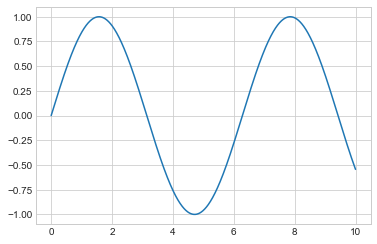

In [256]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.